In [14]:
import os
import cv2
import numpy as np
from skimage.filters import threshold_otsu, threshold_sauvola
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
images_directory = "/content/drive/MyDrive/Dataset/images"
masks_directory = "/content/drive/MyDrive/Dataset/masks"

In [16]:
def dice_score(y_true, y_pred):
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred) + 1e-8)

def jaccard(y_true, y_pred):
    return jaccard_score(y_true.flatten(), y_pred.flatten())

In [17]:
dice_otsu_list = []
jaccard_otsu_list = []

dice_sauvola_list = []
jaccard_sauvola_list = []

In [21]:
images = os.listdir(images_directory)

for filename in tqdm(images):

    image_path = os.path.join(images_directory, filename)
    mask_path = os.path.join(masks_directory, filename)

    image = cv2.imread(image_path, 0)
    mask = cv2.imread(mask_path, 0)

    if image is None or mask is None:
        continue

    mask = (mask > 0).astype(np.uint8)

    otsu_threshold = threshold_otsu(image)
    otsu_prediction = (image > otsu_threshold).astype(np.uint8)

    sauvola_threshold = threshold_sauvola(image, window_size=25)
    sauvola_prediction = (image > sauvola_threshold).astype(np.uint8)

    dice_otsu_list.append(dice_score(mask, otsu_prediction))
    jaccard_otsu_list.append(jaccard(mask, otsu_prediction))

    dice_sauvola_list.append(dice_score(mask, sauvola_prediction))
    jaccard_sauvola_list.append(jaccard(mask, sauvola_prediction))

100%|██████████| 3064/3064 [06:56<00:00,  7.35it/s]


In [23]:
print("Otsu Dice Score:", np.mean(dice_otsu_list))
print("Otsu Jaccard:", np.mean(jaccard_otsu_list))

print("Sauvola Dice Score:", np.mean(dice_sauvola_list))
print("Sauvola Jaccard:", np.mean(jaccard_sauvola_list))

Otsu Dice Score: 0.06887482446035396
Otsu Jaccard: 0.03657381795179588
Sauvola Dice Score: 0.04572609986449374
Sauvola Jaccard: 0.023774776257622886


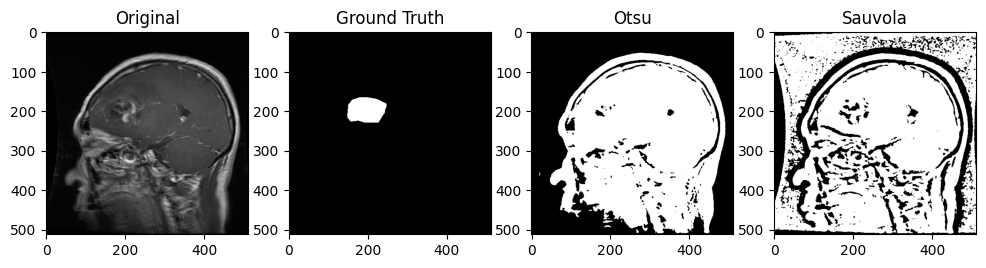

In [26]:
image = cv2.imread(os.path.join(images_directory, images[12]), 0)
mask = cv2.imread(os.path.join(masks_directory, images[12]), 0)

mask = (mask > 0).astype(np.uint8)

otsu_thresh = threshold_otsu(image_blur)
otsu_pred = (image_blur > otsu_thresh).astype(np.uint8)

sauvola_thresh = threshold_sauvola(image_blur, window_size=25)
sauvola_pred = (image_blur > sauvola_thresh).astype(np.uint8)

plt.figure(figsize=(12,6))

plt.subplot(1,4,1)
plt.imshow(image, cmap='gray')
plt.title("Original")

plt.subplot(1,4,2)
plt.imshow(mask, cmap='gray')
plt.title("Ground Truth")

plt.subplot(1,4,3)
plt.imshow(otsu_pred, cmap='gray')
plt.title("Otsu")

plt.subplot(1,4,4)
plt.imshow(sauvola_pred, cmap='gray')
plt.title("Sauvola")

plt.show()

after all experimenting with some preprocessing techniques and parameter changes, i got better results without preprocesing